In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [8]:
print(features[0], labels[0])

tensor([-0.1129,  0.2469]) tensor(3.1398)


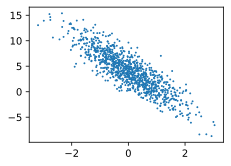

In [12]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i+batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0,j)

In [16]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.0137, -0.0681],
        [-0.7399,  1.0926],
        [-0.6133, -0.9672],
        [ 0.2849, -0.4899],
        [-0.8097,  0.0299],
        [-0.0053, -0.4672],
        [-0.1129,  0.2469],
        [ 0.2337,  0.3667],
        [-0.0910,  1.3346],
        [ 0.0602,  0.8118]]) tensor([ 4.4643, -0.9797,  6.2600,  6.4360,  2.4753,  5.7746,  3.1398,  3.4253,
        -0.5413,  1.5751])


In [17]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
print(w, b)

tensor([[ 0.0043],
        [-0.0121]]) tensor([0.])


In [19]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [20]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [22]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [23]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [27]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for (X, y) in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000055
epoch 2, loss 0.000055
epoch 3, loss 0.000055


In [28]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9993],
        [-3.4002]], requires_grad=True)
4.2 
 tensor([4.1998], requires_grad=True)
